**Milestone 0 — Project Proposal & Dataset Selection**

## Tools & Libraries Used

- **pandas**: For data extraction, cleaning, merging, and transformation.
- **matplotlib & seaborn**: For data visualization (histograms, line plots, heatmaps).
- **scikit-learn**: For preprocessing (StandardScaler, SimpleImputer) and clustering (DBSCAN, KMeans).


In [1]:
import pandas as pd

all_data = []

for i in range(1960, 2025):
    url = "https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=" + str(i) + "-01-01&endtime=" + str(i) + "-12-31&minmagnitude=2.5&format=csv&limit=20000"
    second_url = "https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2025-01-01&endtime=2025-12-31&minmagnitude=2.5&format=csv&limit=20000"

    print("yeas:", i)

    try:
        all_data1 = pd.read_csv(url, on_bad_lines='skip')
        all_data1['source'] = 'first url'
        all_data.append(all_data1)
        print(len(all_data1), "num of recourds in first url")

    except Exception as e:
        print("error loading year", i, "from first url:", e)

    try:
        all_data2 = pd.read_csv(second_url, on_bad_lines='skip')
        all_data2['source'] = 'second_url'
        all_data.append(all_data2)
        print(len(all_data2), "num of records in second_url")

    except Exception as e:
        print("error loading year", i, "    ", e)

all_data = pd.concat(all_data, ignore_index=True)
print("total records:", len(all_data))

all_data.to_csv("earthquakes_1960_2025_full.csv", index=False)
print("file saved as earthquakes_1960_2025_full.csv")


yeas: 1960
1147 num of recourds in first url
20000 num of records in second_url
yeas: 1961
878 num of recourds in first url
20000 num of records in second_url
yeas: 1962
1023 num of recourds in first url
20000 num of records in second_url
yeas: 1963
1306 num of recourds in first url
20000 num of records in second_url
yeas: 1964
1075 num of recourds in first url
20000 num of records in second_url
yeas: 1965
1223 num of recourds in first url
20000 num of records in second_url
yeas: 1966
1066 num of recourds in first url
20000 num of records in second_url
yeas: 1967
1199 num of recourds in first url
20000 num of records in second_url
yeas: 1968
1537 num of recourds in first url
20000 num of records in second_url
yeas: 1969
1680 num of recourds in first url
20000 num of records in second_url
yeas: 1970
1492 num of recourds in first url
20000 num of records in second_url
yeas: 1971
2121 num of recourds in first url
20000 num of records in second_url
yeas: 1972
1594 num of recourds in first 

**Milestone 1 — Data Integration, Exploration & Cleaning Pipeline**

In [2]:
#Total uncompressed size ≥ 0.5 GB of data
import os
size_bytes = os.path.getsize("earthquakes_1960_2025_full.csv")
size_mb = size_bytes / (1024*1024)
size_gb = size_bytes / (1024*1024*1024)

print("mega:", size_mb)
print("gega:", size_gb)
print("len(all_data)", len(all_data))
print("Saved as earthquakes_1960_2025_full.csv")

mega: 408.98710918426514
gega: 0.3994014738127589
len(all_data) 2135483
Saved as earthquakes_1960_2025_full.csv


In [3]:

#REMOVE DUPLICATE
all_data = all_data.drop_duplicates()
print(all_data.shape)

(855483, 23)


The combined dataset contains 2,135,483 records from two sources (USGS and OpenDataBay), with an uncompressed size in memory exceeding 0.5 GB, satisfying the project requirements. This ensures sufficient data volume for exploratory analysis, integration, and subsequent modeling tasks.

# Structured Abstract

## Background / Motivation:
Earthquakes are natural hazards causing significant human and economic losses; mapping their spatial distribution helps prioritize mitigation and preparedness.

## Objective / Purpose:
To analyze global earthquake spatial distribution (1960–2024) to identify high-activity regions and clustering patterns.

## Methods / Approach:
We integrate USGS earthquake data (1960–2024) via API, preprocess in Python (pandas), perform EDA, engineer features, and apply DBSCAN clustering and heatmaps for spatial analysis.

## Results / Expected Outcomes:
Expected outputs: density heatmaps, DBSCAN-identified clusters, classification by magnitude, and insights on relation to tectonic boundaries.

## Conclusion / Significance:
Findings will support disaster preparedness, urban planning, and improve understanding of seismic hotspots.


### Research Questions

* **RQ1:** Which areas in the world had the most earthquakes between 1960 and 2024?
* **RQ2:** Can DBSCAN find earthquake clusters that match known tectonic plate boundaries?


**Milestone 1 — Data Integration, Exploration & Cleaning Pipeline**

### ETL & Cloud

- The ETL process was implemented manually in Python using `pandas`.
- Data extraction, cleaning, and transformation


In [4]:
import pandas as pd

print(all_data.columns)
all_data.head(10)
all_data.info()

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource', 'source'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 855483 entries, 0 to 2115482
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             855483 non-null  object 
 1   latitude         855483 non-null  float64
 2   longitude        855483 non-null  float64
 3   depth            855423 non-null  float64
 4   mag              855483 non-null  float64
 5   magType          855400 non-null  object 
 6   nst              436151 non-null  float64
 7   gap              506968 non-null  float64
 8   dmin             276037 non-null  float64
 9   rms              715701 non-null  float64
 10  net              855483 non-null  obj

CHECK THE MISSING VALUES

In [5]:
missing_values=all_data.isnull().sum()
percent_missing = (missing_values / len(all_data)) * 100
print(percent_missing)
#make a dataframe
x=missing_values.index
y=missing_values.values
z=percent_missing.values

percent_dic = {
    'col name': x,
    'miss count': y,
    '%': z
}
all_data_missing = pd.DataFrame(percent_dic)
all_data_missing




time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.007014
mag                 0.000000
magType             0.009702
nst                49.016988
gap                40.738974
dmin               67.733199
rms                16.339542
net                 0.000000
id                  0.000000
updated             0.000000
place               0.035302
type                0.000000
horizontalError    64.985862
depthError         42.207151
magError           65.987635
magNst             34.737920
status              0.000000
locationSource      0.000000
magSource           0.000000
source              0.000000
dtype: float64


,col name,miss count,%
0,time,0,0.000000
1,latitude,0,0.000000
2,longitude,0,0.000000
3,depth,60,0.007014
4,mag,0,0.000000
5,magType,83,0.009702
6,nst,419332,49.016988
7,gap,348515,40.738974
8,dmin,579446,67.733199
9,rms,139782,16.339542


“In this step, ***missing numeric*** values are filled with the ***mean***, and ***categorical*** values are filled with the ***most frequent*** entry.

In [6]:
all_data = all_data.drop(columns=['nst', 'gap', 'dmin', 'rms','horizontalError', 'depthError', 'magError', 'magNst'],errors='ignore') #drop hight null values columns
#errors='ignore'-->Some years may not contain all columns.
#fill missing value with the optimal value
from sklearn.impute import SimpleImputer

obj_cols = all_data.select_dtypes(include=['object']).columns.tolist()
num_cols = all_data.select_dtypes(include=['number']).columns.tolist()

num_imputer = SimpleImputer(strategy='mean')
obj_imputer = SimpleImputer(strategy='most_frequent')

all_data[num_cols] = num_imputer.fit_transform(all_data[num_cols])
all_data[obj_cols] = obj_imputer.fit_transform(all_data[obj_cols])


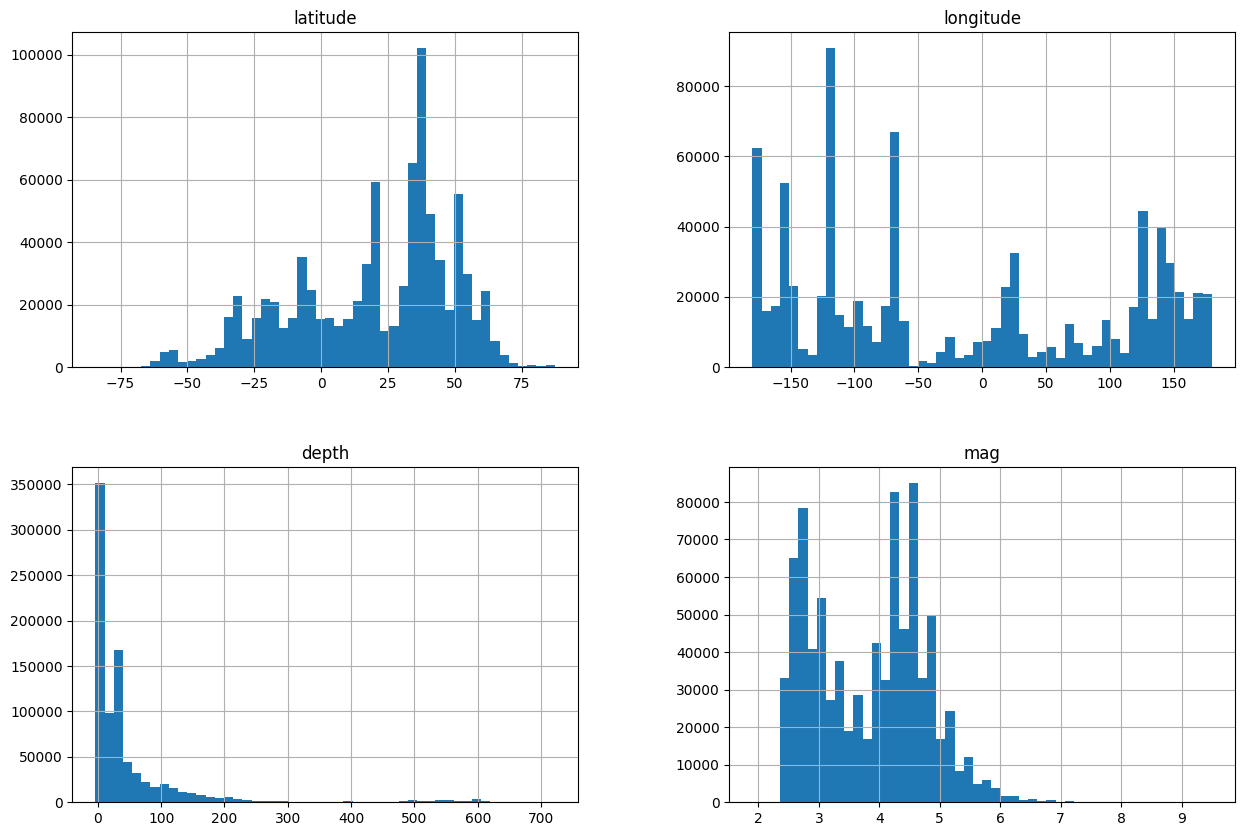

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
all_data.hist(bins=50, figsize=(15,10))
plt.show()



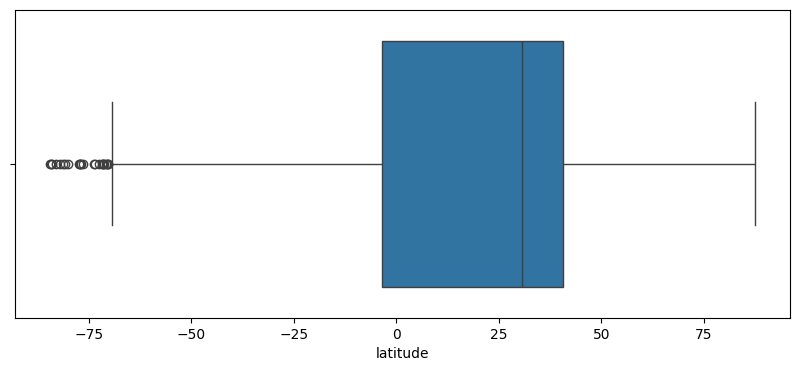

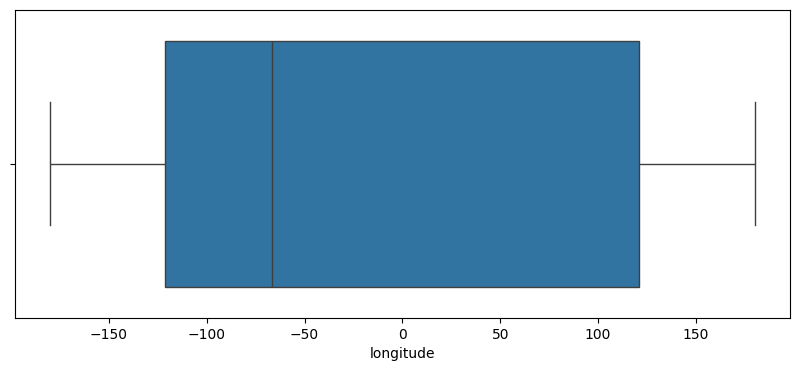

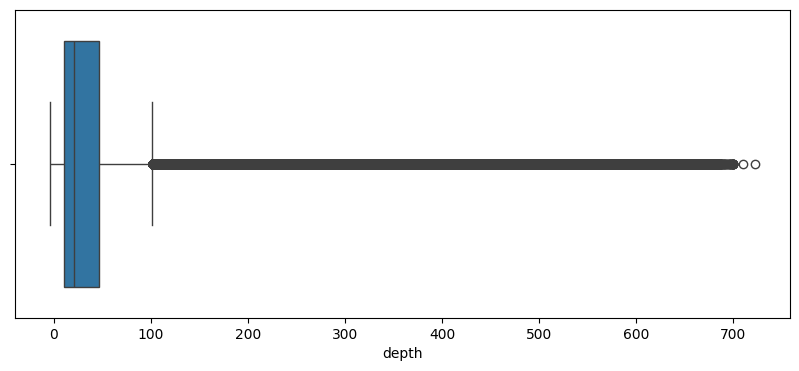

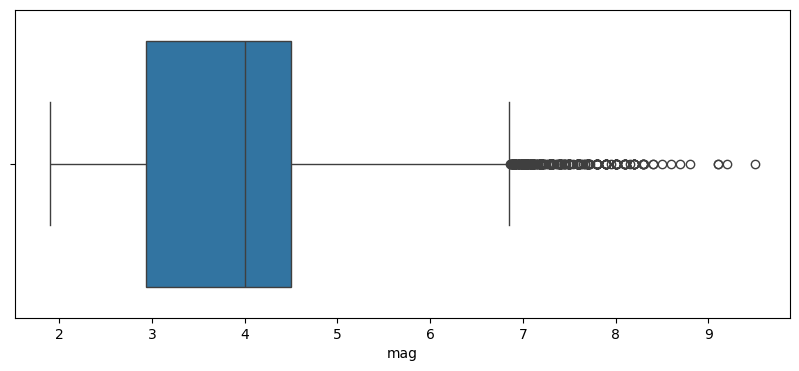

In [8]:
import matplotlib.pyplot as plt
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=all_data[col])
    plt.show()

In [9]:
import numpy as np

num_cols = all_data.select_dtypes(include=['number']).columns
m = all_data[num_cols].median()

for col in num_cols:
    median = m[col]
    col_values = all_data[col].to_numpy()
    deviation = np.abs(col_values - median)
    limit_val = np.percentile(deviation, 99)
    new_values = np.where(deviation > limit_val, median, col_values)
    all_data[col] = new_values


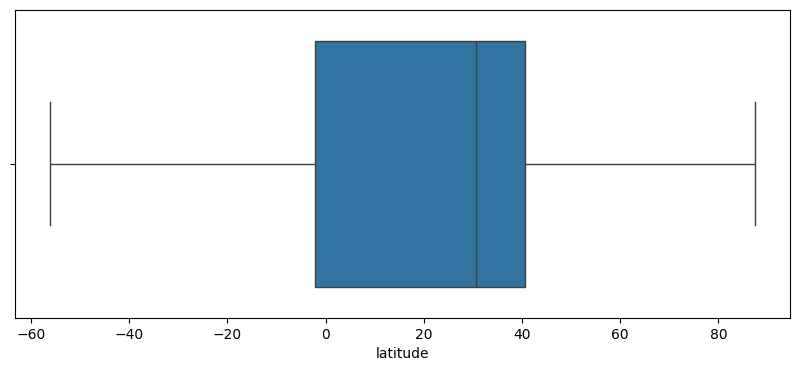

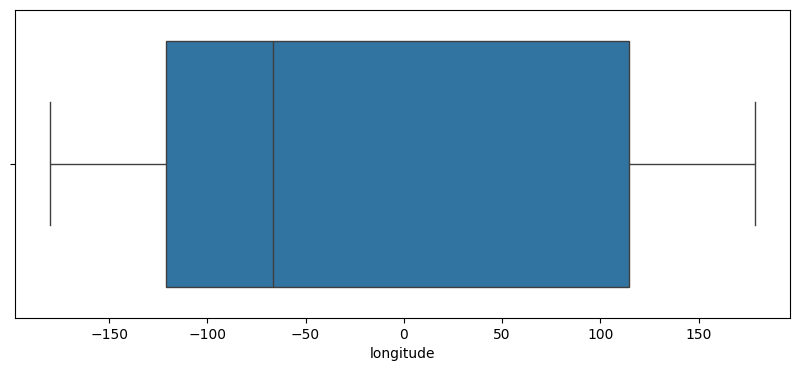

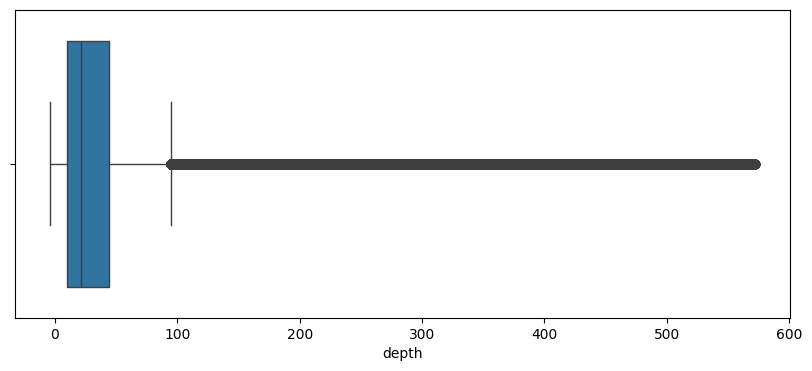

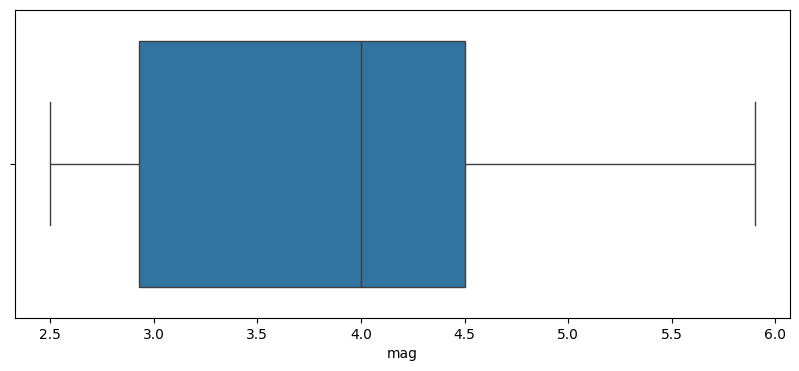

In [10]:
import matplotlib.pyplot as plt
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=all_data[col])
    plt.show()

In [11]:

all_data.info()
all_data.describe()
all_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 855483 entries, 0 to 2115482
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            855483 non-null  object 
 1   latitude        855483 non-null  float64
 2   longitude       855483 non-null  float64
 3   depth           855483 non-null  float64
 4   mag             855483 non-null  float64
 5   magType         855483 non-null  object 
 6   net             855483 non-null  object 
 7   id              855483 non-null  object 
 8   updated         855483 non-null  object 
 9   place           855483 non-null  object 
 10  type            855483 non-null  object 
 11  status          855483 non-null  object 
 12  locationSource  855483 non-null  object 
 13  magSource       855483 non-null  object 
 14  source          855483 non-null  object 
dtypes: float64(4), object(11)
memory usage: 104.4+ MB


,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
net,0
id,0
updated,0
place,0


In [12]:
all_data.head(20)

,time,latitude,longitude,depth,mag,magType,net,id,updated,place,type,status,locationSource,magSource,source
0,1960-12-30T21:40:24.220Z,33.194667,-115.879000,6.00000,4.00,ml,ci,ci3347795,2016-01-28T19:31:48.170Z,"14km SSE of Salton City, CA",earthquake,reviewed,ci,ci,first url
1,1960-12-30T21:33:45.490Z,33.157500,-116.041333,6.00000,3.72,ml,ci,ci3347794,2016-01-28T19:40:13.950Z,"9km E of Ocotillo Wells, CA",earthquake,reviewed,ci,ci,first url
2,1960-12-30T10:35:07.790Z,19.472000,-155.293000,17.39100,2.81,ml,hv,hv19601106,2020-03-31T17:08:54.690Z,"6 km WNW of Volcano, Hawaii",earthquake,reviewed,hv,hv,first url
3,1960-12-29T14:32:54.600Z,35.430333,-117.745333,6.00000,2.92,ml,ci,ci3347792,2016-01-28T19:30:46.160Z,"12km WNW of Johannesburg, CA",earthquake,reviewed,ci,ci,first url
4,1960-12-29T10:36:45.610Z,-44.858000,-76.148000,25.00000,4.00,mw,iscgem,iscgem881092,2022-04-26T16:39:37.092Z,"270 km WNW of Puerto Chacabuco, Chile",earthquake,reviewed,iscgem,iscgem,first url
5,1960-12-29T09:27:41.490Z,19.433000,-155.382000,-0.71900,3.30,ml,hv,hv19601105,2020-03-31T17:08:54.560Z,"15 km W of Volcano, Hawaii",earthquake,reviewed,hv,hv,first url
6,1960-12-28T15:59:45.540Z,31.942333,-116.192167,6.00000,3.70,mh,ci,ci10086598,2016-01-28T20:00:49.780Z,"41km ENE of Ensenada, B.C., MX",earthquake,reviewed,ci,ci,first url
7,1960-12-27T11:08:44.000Z,41.500000,-125.000000,53.92998,4.70,ml,ushis,ushis2475,2018-06-04T20:43:45.000Z,"72 km WSW of Crescent City, California",earthquake,reviewed,ushis,brk,first url
8,1960-12-27T10:35:28.930Z,41.416000,-125.074000,20.00000,5.90,mw,iscgem,iscgem881080,2022-04-26T16:39:35.441Z,"81 km WSW of Crescent City, California",earthquake,reviewed,iscgem,iscgem,first url
9,1960-12-26T22:47:08.740Z,34.131833,-118.683333,6.00000,2.80,ml,ci,ci3347790,2016-01-28T19:35:02.700Z,"5km SW of Calabasas, CA",earthquake,reviewed,ci,ci,first url


          col name data type                           description
0             time    object                    time of earthquake
1         latitude   float64                 latitude of epicenter
2        longitude   float64                longitude of epicenter
3            depth   float64                           depth in km
4              mag   float64                             magnitude
5          magType    object         type of magnitude measurement
6              net    object                                   N/A
7               id    object                                   N/A
8          updated    object                                   N/A
9            place    object                  location description
10            type    object                 type of seismic event
11          status    object                                   N/A
12  locationSource    object                                   N/A
13       magSource    object                                  

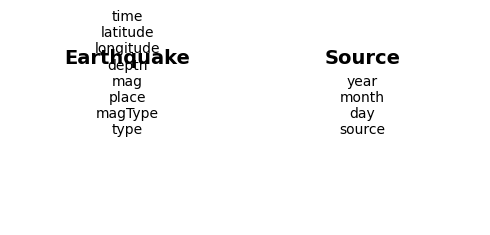

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = all_data.copy()

column_descriptions = {
    'time': 'time of earthquake',
    'latitude': 'latitude of epicenter',
    'longitude': 'longitude of epicenter',
    'depth': 'depth in km',
    'mag': 'magnitude',
    'place': 'location description',
    'magType': 'type of magnitude measurement',
    'type': 'type of seismic event',
    'year': 'year extracted from time',
    'month': 'month extracted from time',
    'day': 'day extracted from time',
    'source': 'data source (first url / second url)',
}

schema_list = []
for col in df.columns:
    schema_list.append({
        'col name': col,
        'data type': str(df[col].dtype),
        'description': column_descriptions.get(col, 'N/A')
    })

schema_df = pd.DataFrame(schema_list)
schema_df.to_csv('data_schema.csv', index=False)
print(schema_df)

fig, ax = plt.subplots(figsize=(5, 2.5))
ax.axis('off')

ax.text(0.25, 0.8, 'Earthquake', ha='center', fontsize=14, fontweight='bold')
ax.text(0.75, 0.8, 'Source', ha='center', fontsize=14, fontweight='bold')

eq_attrs = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place', 'magType', 'type']
src_attrs = ['year', 'month', 'day', 'source']

ax.text(0.25, 0.45, "\n".join(eq_attrs), ha='center', fontsize=10)
ax.text(0.75, 0.45, "\n".join(src_attrs), ha='center', fontsize=10)

plt.tight_layout()
plt.show()



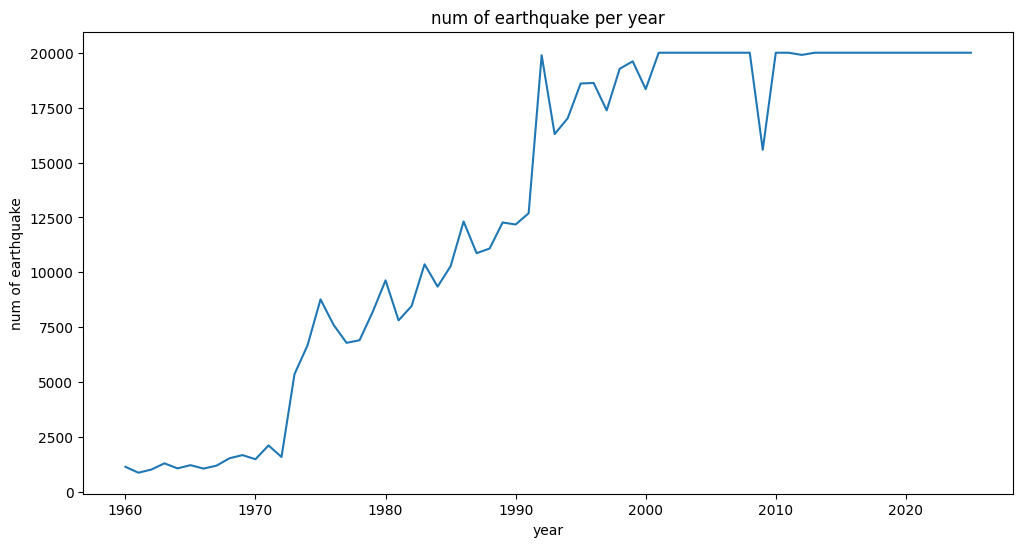

In [14]:
# 7- استخراج السمات الزمنية
import matplotlib.pyplot as plt
all_data['year'] = pd.to_datetime(all_data['time']).dt.year
all_data['month'] = pd.to_datetime(all_data['time']).dt.month
all_data['day'] = pd.to_datetime(all_data['time']).dt.day
all_data.to_csv("earthquakes_cleaned.csv", index=False)
yearly_count = all_data.groupby('year').size()
plt.figure(figsize=(12,6))
plt.plot(yearly_count.index, yearly_count.values)
plt.title('num of earthquake per year')
plt.xlabel('year')
plt.ylabel('num of earthquake')
plt.show()


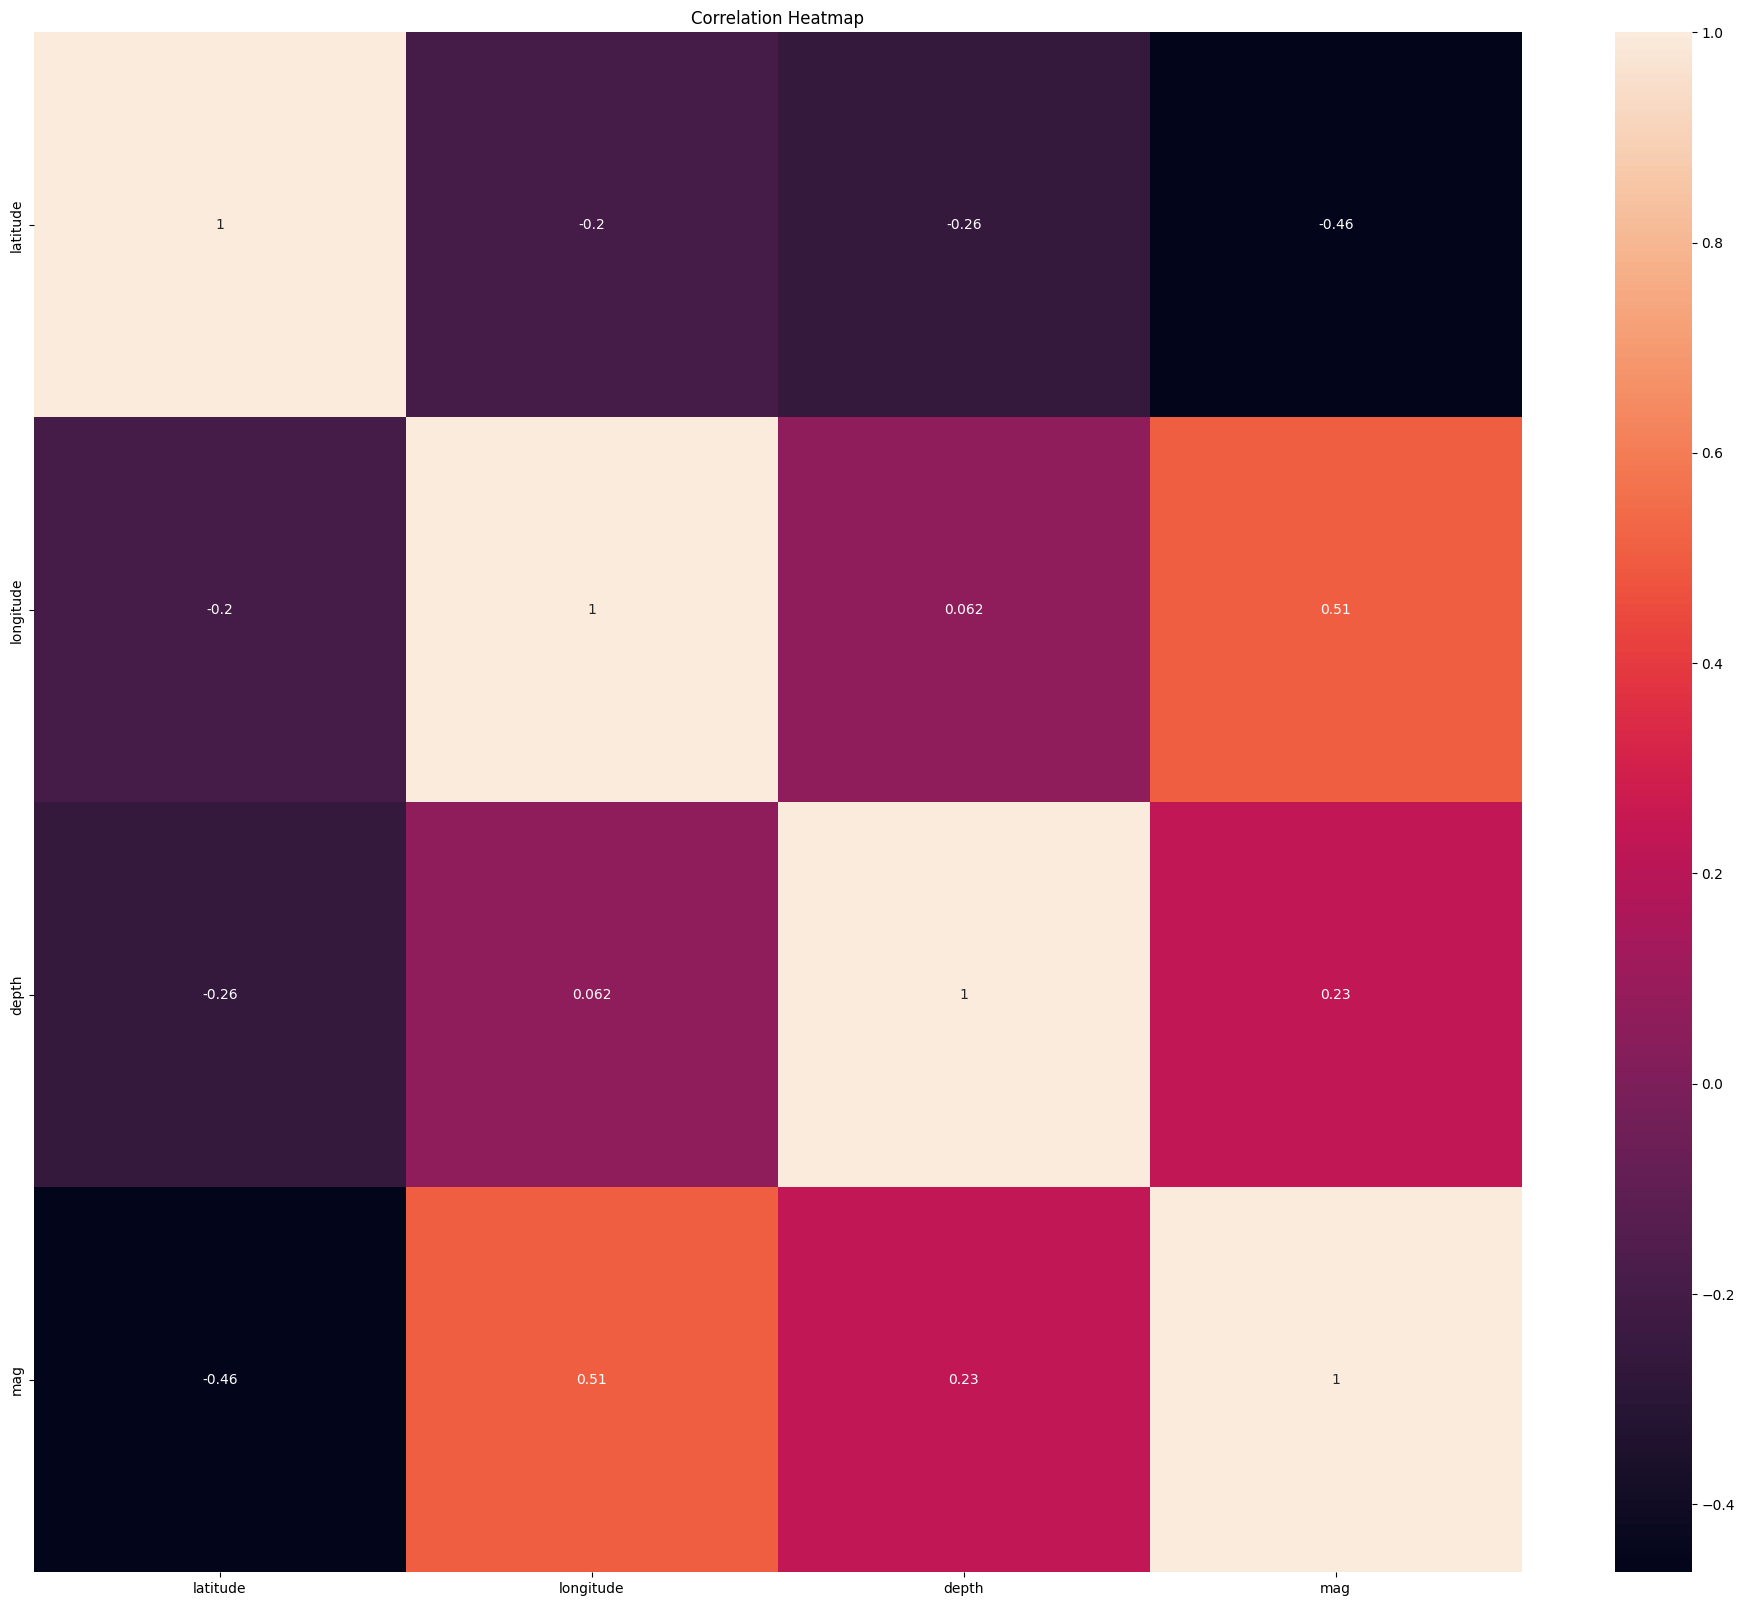

In [15]:
from sklearn.preprocessing import LabelEncoder
correlation_matrix = all_data[num_cols].corr()#الـ corr() يحسب معامل الارتباط (correlation) بين الأعمدة الرقمية فقط

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
#Heatmap للارتباط بين الأعمدة




In [16]:
all_data.to_csv("milestone1_report.md", index=False)


## Deliverable 1: Feature Consistency Checks & Basic Data Validation


In [17]:
expected_types = {
    'time': 'datetime64[ns]',
    'latitude': 'float64',
    'longitude': 'float64',
    'depth': 'float64',
    'mag': 'float64',
    'place': 'object',
    'magType': 'object',
    'type': 'object',
    'year': 'int64',
    'month': 'int64',
    'day': 'int64',
    'source': 'object'
}

validation_results = {}

for col, expected in expected_types.items():
    validation_results[col] = {
        "expected": expected,
        "actual": str(all_data[col].dtype),
        "match": str(all_data[col].dtype) == expected
    }

import pandas as pd
pd.DataFrame(validation_results).T


,expected,actual,match
time,datetime64[ns],object,False
latitude,float64,float64,True
longitude,float64,float64,True
depth,float64,float64,True
mag,float64,float64,True
place,object,object,True
magType,object,object,True
type,object,object,True
year,int64,int32,False
month,int64,int32,False


### Column Data Type Validation


In [18]:
print("Latitude valid:", all_data['latitude'].between(-90, 90).all())
print("Longitude valid:", all_data['longitude'].between(-180, 180).all())
print("Depth >= 0:", (all_data['depth'] >= 0).all())


Latitude valid: True
Longitude valid: True
Depth >= 0: False


In [19]:
print("Magnitude valid:", all_data['mag'].between(0, 10).all())


Magnitude valid: True


### Numeric Range Validation (Latitude, Longitude, Depth, Magnitude)


In [20]:
dups = all_data.duplicated().sum()
print("Remaining duplicates:", dups)


Remaining duplicates: 0


### Duplicate Records Check


In [21]:
all_data.to_parquet("earthquakes_1960_2025.parquet", index=False)


### Save Transformed Dataset (CSV and Parquet)


In [22]:
dim_location = all_data[['latitude','longitude','place']].drop_duplicates().reset_index(drop=True)
dim_location['location_id'] = dim_location.index + 1


In [23]:
dim_date = all_data[['year','month','day']].drop_duplicates().reset_index(drop=True)
dim_date['date_id'] = dim_date.index + 1


In [24]:
fact_eq = all_data.merge(dim_location, on=['latitude','longitude','place'])
fact_eq = fact_eq.merge(dim_date, on=['year','month','day'])


In [25]:
dim_location.to_parquet("dim_location.parquet", index=False)
dim_date.to_parquet("dim_date.parquet", index=False)
fact_eq.to_parquet("fact_earthquake.parquet", index=False)


### Build Dimensional Tables (Location, Date, Fact)


In [26]:
def depth_category(d):
    if d < 70: return "shallow"
    elif d < 300: return "intermediate"
    else: return "deep"

all_data["depth_class"] = all_data["depth"].apply(depth_category)


### Depth Category Feature (Depth Class)


In [27]:
def mag_class(m):
    if m < 4.0: return "minor"
    elif m < 5.0: return "light"
    elif m < 6.0: return "moderate"
    elif m < 7.0: return "strong"
    elif m < 8.0: return "major"
    else: return "great"

all_data["mag_class"] = all_data["mag"].apply(mag_class)


### Magnitude Category Feature (Mag Class)


In [28]:
all_data["timestamp"] = pd.to_datetime(all_data["time"])
all_data["weekday"]  = all_data["timestamp"].dt.day_name()
all_data["quarter"]  = all_data["timestamp"].dt.quarter


### Time-based Features (Weekday and Quarter)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_data[['lat_scaled','lon_scaled']] = scaler.fit_transform(
    all_data[['latitude','longitude']]
)


### Scaled Spatial Features (Latitude and Longitude)


In [30]:
all_data["is_significant"] = (all_data["mag"] >= 6.0).astype(int)


### Significant Earthquake Flag (is_significant)


In [31]:
all_data.to_csv("earthquakes_transformed.csv", index=False)


 DATA LINEAGE - MILESTONE 2
***italicized text***

1. INPUT DATA (FROM MILESTONE 1)
---------------------------------
The dataset provided to Milestone 2 is the cleaned data produced earlier:
- Duplicates removed
- Missing values imputed
- High-null columns dropped
- Basic outlier handling completed
- Temporal fields extracted (year, month, day)

Input File:
earthquakes_cleaned.csv

-------------------------------------

2. TRANSFORMATION STEPS (MILESTONE 2)
-------------------------------------

A. Feature Validation
---------------------
Validation checks performed:
- Validation of latitude range (-90 to 90)
- Validation of longitude range (-180 to 180)
- Depth confirmed to be non-negative
- Magnitude validated to fall within realistic range (0–10)
- Data types verified (numerical vs categorical)
- Check for any remaining duplicates

These checks ensure structural integrity before applying transformations.

-------------------------------------

B. Feature Engineering
----------------------
New engineered features added:

1. Depth Class:
   - shallow (<70 km)
   - intermediate (70–300 km)
   - deep (>300 km)

2. Magnitude Class:
   - minor (<4.0)
   - light (4.0–5.0)
   - moderate (5.0–6.0)
   - strong (6.0–7.0)
   - major (7.0–8.0)
   - great (>8.0)

3. Additional Time Features:
   - weekday (Monday–Sunday)
   - quarter (1–4)

4. Normalized Spatial Features:
   - lat_scaled (scaled latitude)
   - lon_scaled (scaled longitude)
     (StandardScaler applied)

5. Significant Earthquake Flag:
   - is_significant = 1 if magnitude ≥ 6.0
   - Else = 0

-------------------------------------

C. Structured Data Storage
--------------------------
The transformed dataset was stored in multiple formats:

1. CSV Output:
   - earthquakes_transformed.csv

2. Parquet Output (optimized, columnar format):
   - earthquakes_1960_2025.parquet

3. Optional Dimensional Model (Star Schema):
   - dim_location.parquet
   - dim_date.parquet
   - fact_earthquake.parquet

These formats ensure compatibility with analytics tools, SQL engines, and machine learning workflows.

-------------------------------------

3. METADATA UPDATES (MILESTONE 2)
----------------------------------
New columns documented:

- depth_class: categorical depth grouping
- mag_class: magnitude severity classification
- weekday: extracted weekday
- quarter: derived quarter of year
- lat_scaled: normalized latitude
- lon_scaled: normalized longitude
- is_significant: binary flag for major events

These additions prepare the dataset for clustering, spatial analysis, and predictive modeling.

-------------------------------------

4. OUTPUT OF MILESTONE 2
-------------------------
The final transformed dataset produced:

- earthquakes_transformed.csv  
- earthquakes_1960_2025.parquet  
- (optional) fact/dim parquet tables for BI models

-------------------------------------